# 1.Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 2.Importing Dataset

In [3]:
pd.set_option('display.max_columns',None)
df=pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 3.EDA

In [4]:
# Finding null values

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No Null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


1. Categorical : 9<br>
2. Numerical : 6<br>
3. All are non null rows<br>
4. No. of columns: 15<br>
5. No. of rows: 32560

In [6]:
#To find the unique values in each columns

df.nunique().to_frame()

,0
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [7]:
#Count of each unique value in every column

for i in df.columns:
    print(df[i].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int6

In Columns 'Workclass','Occupation','Native_country' unique value: '?' is present. Count as per below:<br>
Workclass: 1836<br>
Occupation: 1843<br>
Native_country: 583<br>

In [8]:
# Replacing " ?" with np.nan in all columns
df=df.replace(' ?',np.nan)

#Checking for null values

df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [9]:
#Dropping NaN values
df=df.dropna()

In [10]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# 4.Description of Dataset

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,30161.0,38.437883,13.134882,17.0,28.0,37.0,47.0,90.0
Fnlwgt,30161.0,189797.556547,105652.744919,13769.0,117628.0,178429.0,237630.0,1484705.0
Education_num,30161.0,10.121216,2.549983,1.0,9.0,10.0,13.0,16.0
Capital_gain,30161.0,1091.971984,7406.466659,0.0,0.0,0.0,0.0,99999.0
Capital_loss,30161.0,88.375419,404.304753,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,30161.0,40.931269,11.980182,1.0,40.0,40.0,45.0,99.0


# 5.Data Visulaization

## 5.1 Univariate Analysis

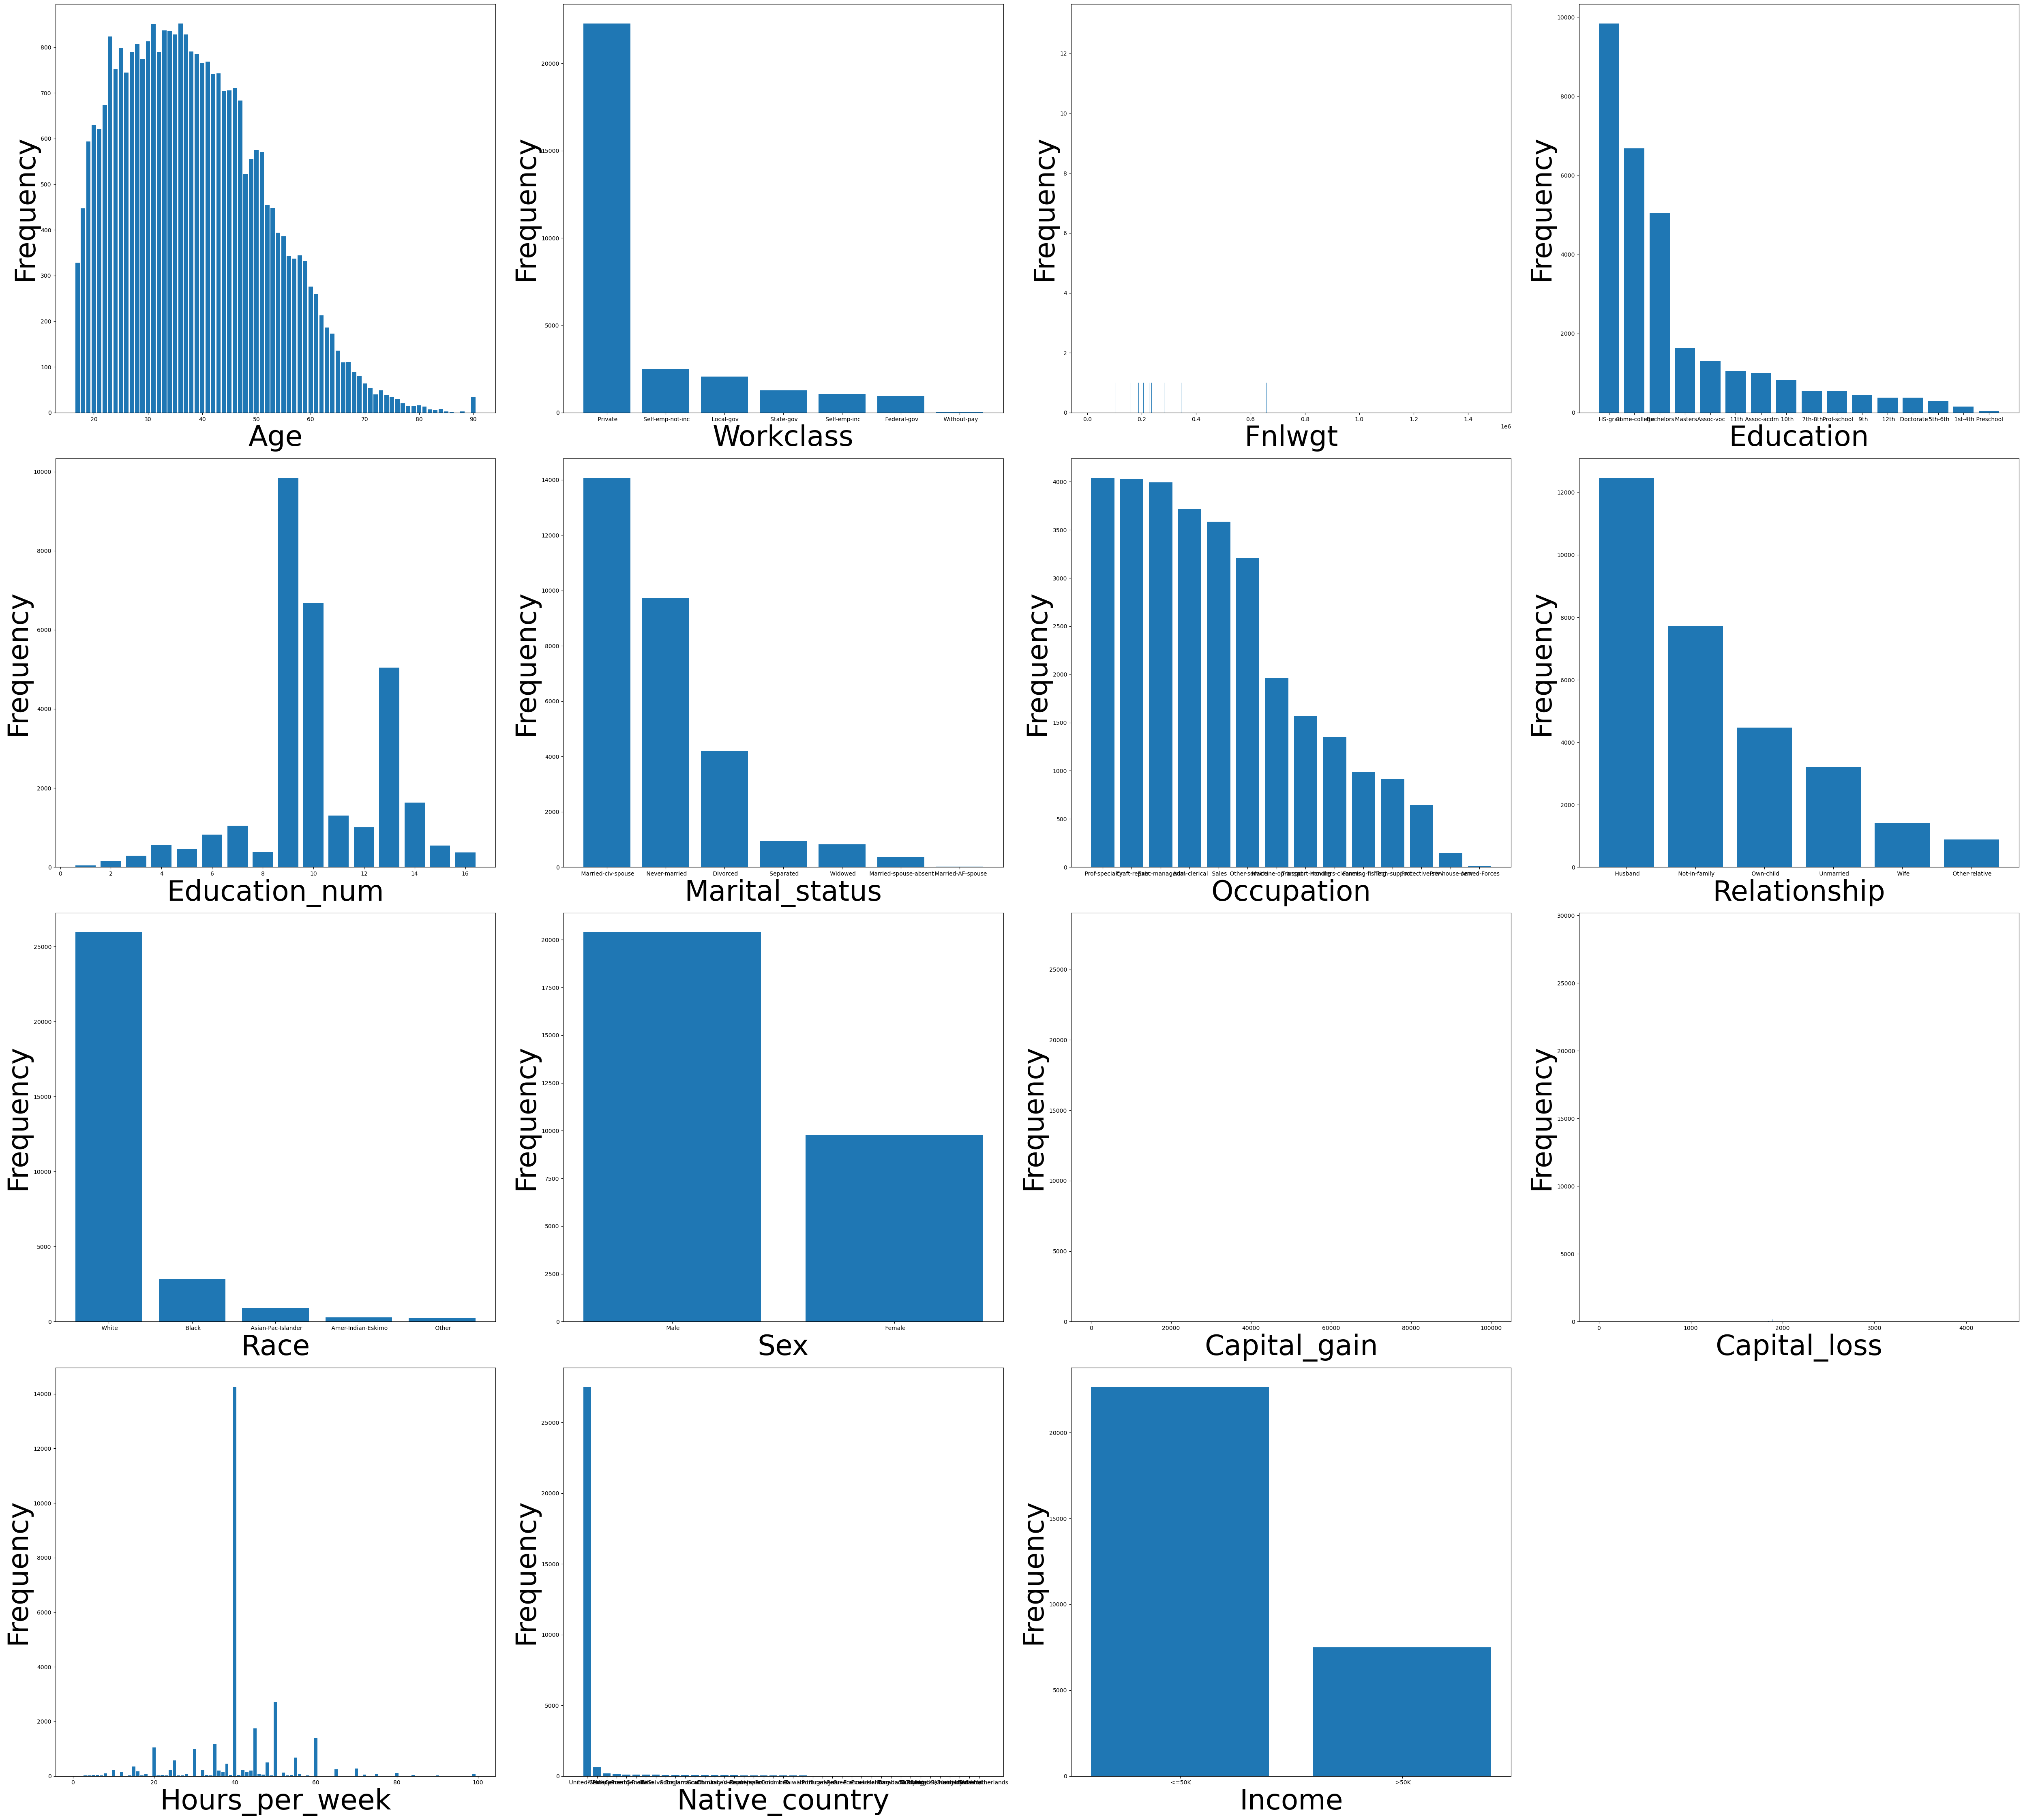

In [12]:
list=['Age','Workclass','Fnlwgt','Education','Education_num','Marital_status','Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss','Hours_per_week','Native_country','Income']
plt.figure(figsize=(50,45))
iterator=1
for i,col in enumerate(list):
    if iterator <=15:
        value=df[col].value_counts()
        ax=plt.subplot(4, 4, iterator)
        plt.bar(value.index,value.values)
        plt.xlabel(col, fontsize=50)
        plt.ylabel('Frequency', fontsize=50)
    iterator+=1
plt.tight_layout()

From above data we find that most number of people are:<br>
Young , White, Male who are High School Graduates with 9 & 10 years of Education, working in Private sector with 40 hours per week.

## 5.2 Bivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

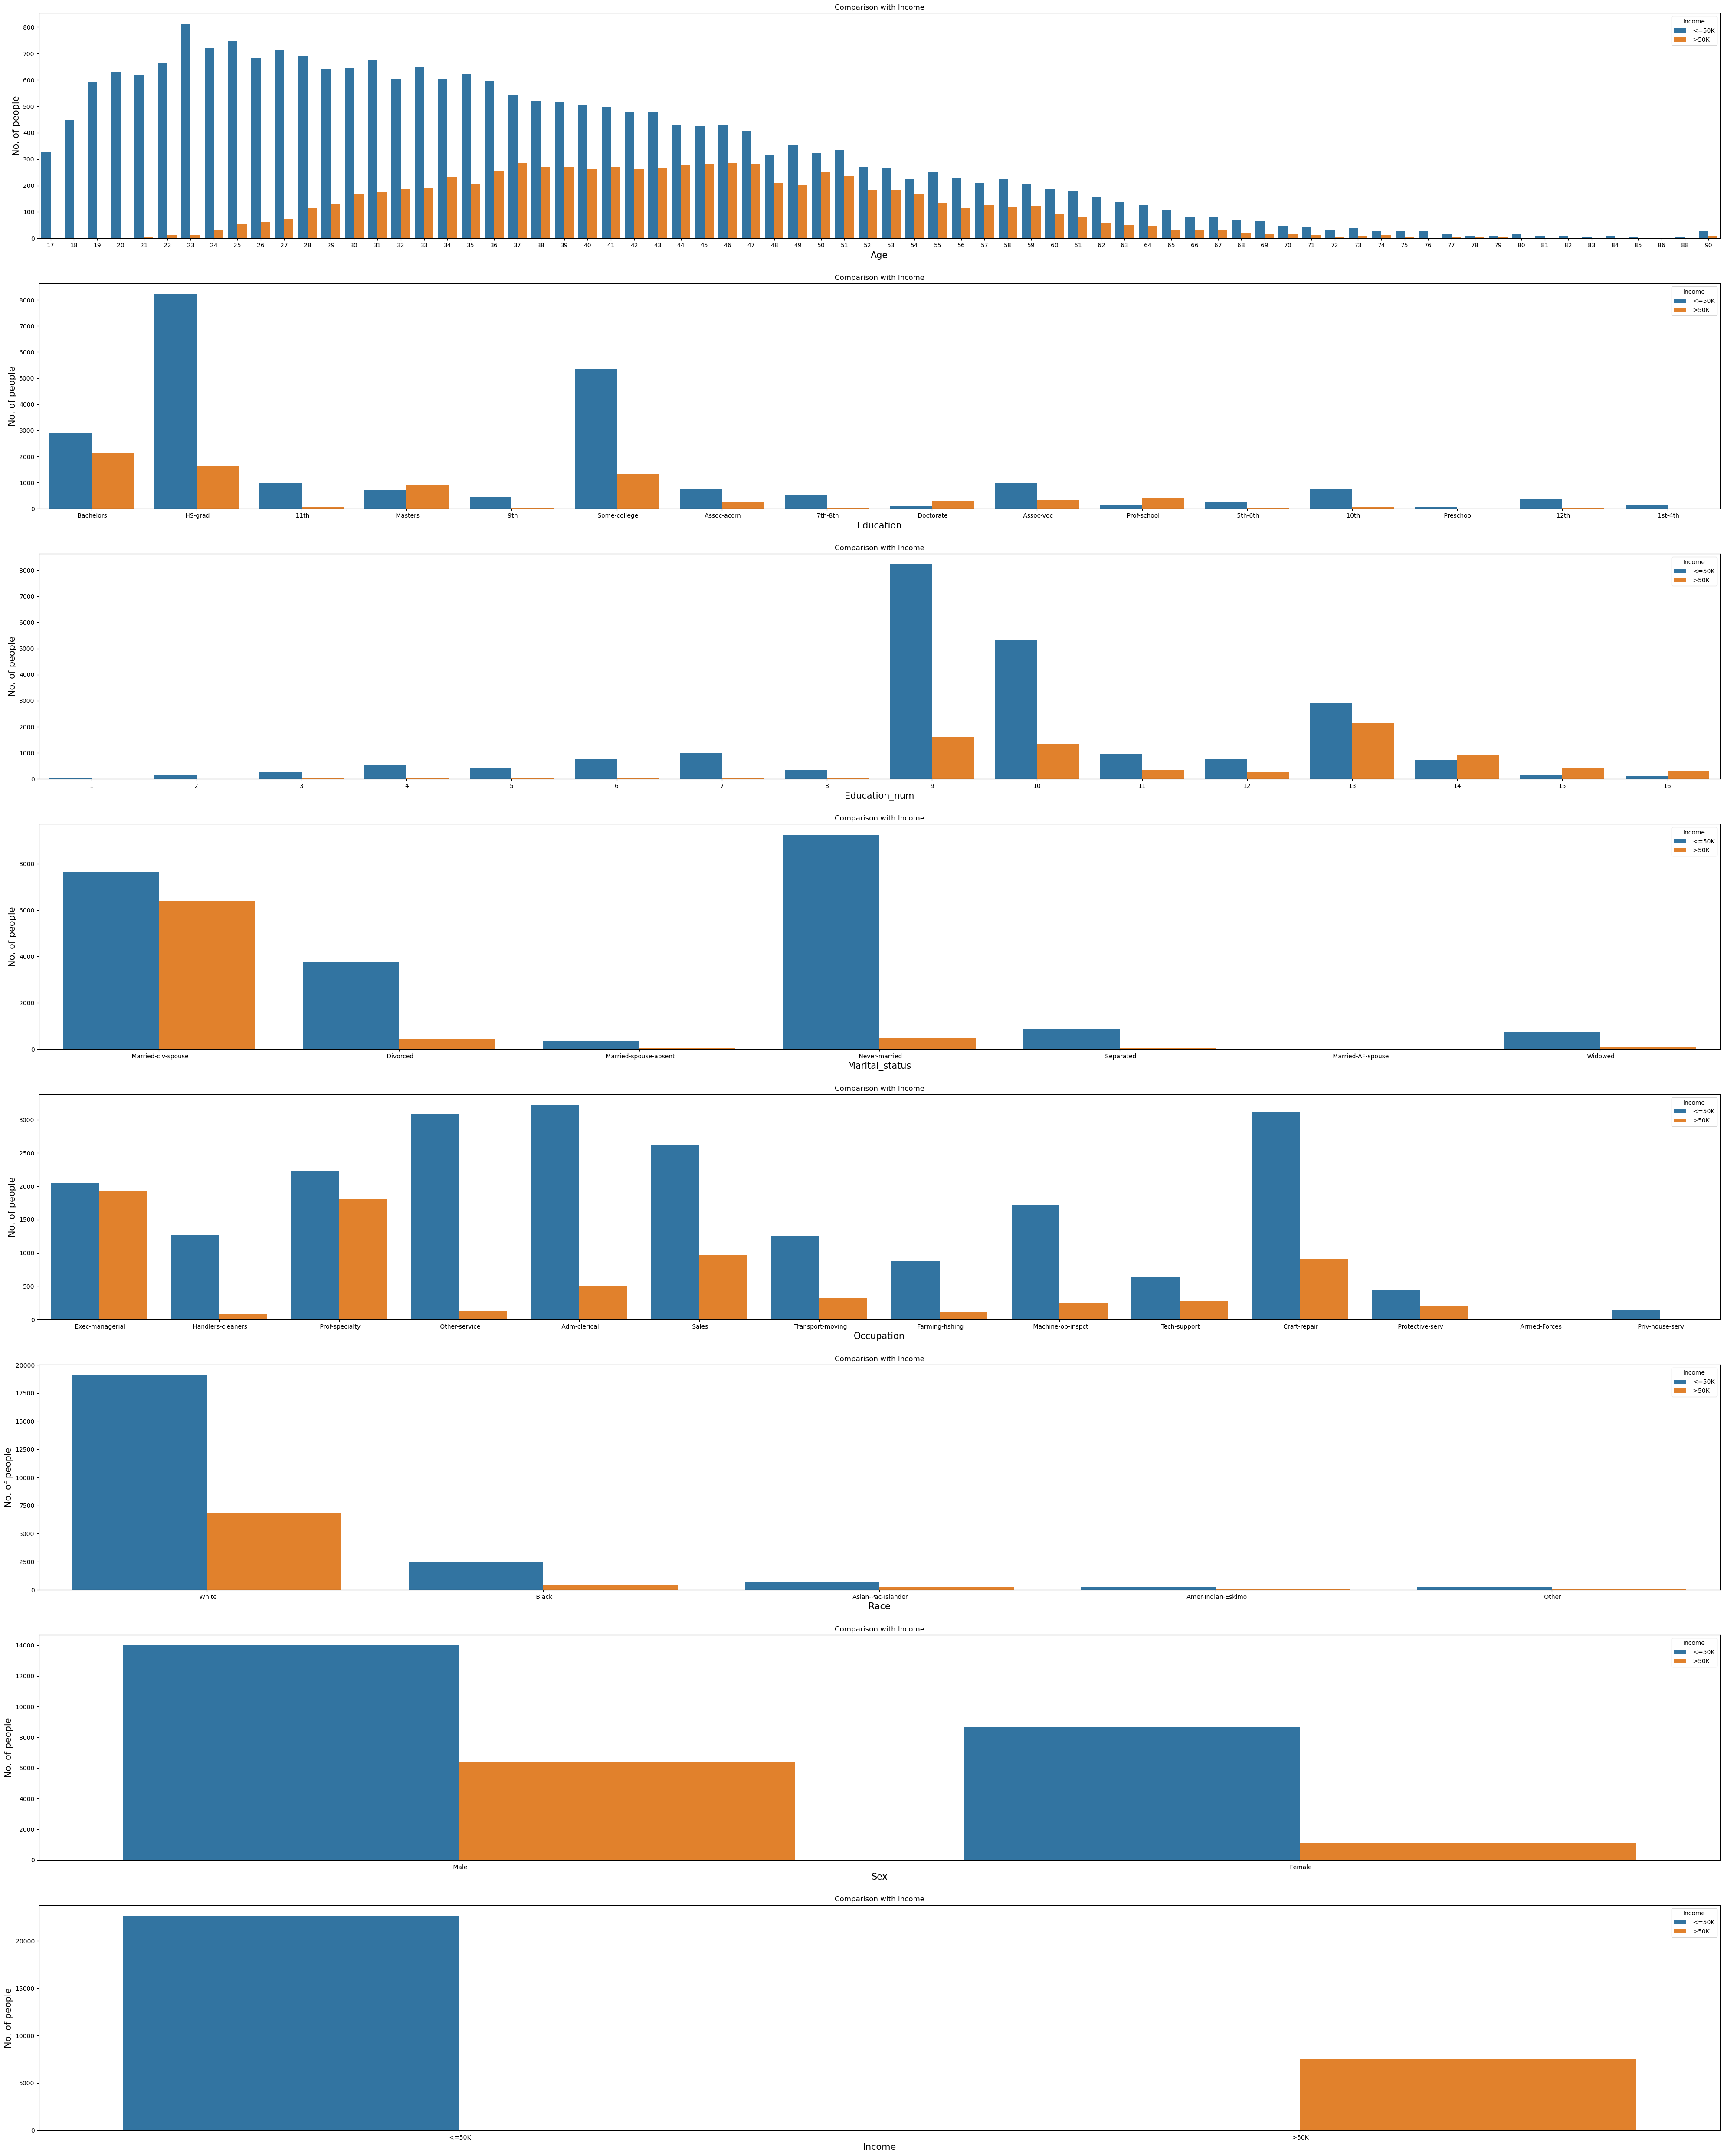

In [13]:
column=['Age','Education','Education_num','Marital_status','Occupation','Race','Sex','Income']
plt.figure(figsize=(50,120))
iterator=1
for col in column:
    if iterator <= 15:
        plt.subplot(15,1,iterator)
        sns.countplot(data=df, x=col,hue='Income')
        plt.title('Comparison with Income')
        plt.xlabel(col, fontsize=15)
        plt.ylabel('No. of people', fontsize=15)
        iterator+=1 
plt.show

From the above Bivariate Analysis, we can find <br>
White, Male people in the age group 35-50 yrs, having Bachelor's degree with 13 years of education, Married with Spouse, who are either Exec-managerial or Prof-speciality are earning >50K.

# 6. Label Encoder

In [14]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
for col in df.columns:
    if df[col].dtypes=='object':
        df[col]=LE.fit_transform(df[col])

In [15]:
# Checking for Column datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             30161 non-null  int64
 1   Workclass       30161 non-null  int32
 2   Fnlwgt          30161 non-null  int64
 3   Education       30161 non-null  int32
 4   Education_num   30161 non-null  int64
 5   Marital_status  30161 non-null  int32
 6   Occupation      30161 non-null  int32
 7   Relationship    30161 non-null  int32
 8   Race            30161 non-null  int32
 9   Sex             30161 non-null  int32
 10  Capital_gain    30161 non-null  int64
 11  Capital_loss    30161 non-null  int64
 12  Hours_per_week  30161 non-null  int64
 13  Native_country  30161 non-null  int32
 14  Income          30161 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [16]:
# Converting to float64
for i in df.columns:
    if df[i].dtypes=='int64':
        df[i]=df[i].astype('float64')
    else:
        df[i]=df[i].astype('float64')

In [17]:
#Checking for datatype after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             30161 non-null  float64
 1   Workclass       30161 non-null  float64
 2   Fnlwgt          30161 non-null  float64
 3   Education       30161 non-null  float64
 4   Education_num   30161 non-null  float64
 5   Marital_status  30161 non-null  float64
 6   Occupation      30161 non-null  float64
 7   Relationship    30161 non-null  float64
 8   Race            30161 non-null  float64
 9   Sex             30161 non-null  float64
 10  Capital_gain    30161 non-null  float64
 11  Capital_loss    30161 non-null  float64
 12  Hours_per_week  30161 non-null  float64
 13  Native_country  30161 non-null  float64
 14  Income          30161 non-null  float64
dtypes: float64(15)
memory usage: 3.7 MB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,30161.0,38.437883,13.134882,17.0,28.0,37.0,47.0,90.0
Workclass,30161.0,2.199231,0.953804,0.0,2.0,2.0,2.0,6.0
Fnlwgt,30161.0,189797.556547,105652.744919,13769.0,117628.0,178429.0,237630.0,1484705.0
Education,30161.0,10.333809,3.812347,0.0,9.0,11.0,12.0,15.0
Education_num,30161.0,10.121216,2.549983,1.0,9.0,10.0,13.0,16.0
Marital_status,30161.0,2.580087,1.498018,0.0,2.0,2.0,4.0,6.0
Occupation,30161.0,5.960048,4.029487,0.0,2.0,6.0,9.0,13.0
Relationship,30161.0,1.418355,1.601363,0.0,0.0,1.0,3.0,5.0
Race,30161.0,3.678592,0.834721,0.0,4.0,4.0,4.0,4.0
Sex,30161.0,0.675674,0.468130,0.0,0.0,1.0,1.0,1.0


Summary :<br>
1. Mean~Median: Age,  Fnlwgt,Education, Education_num, Occupation, Relationship, Race, Sex, Hours_per_week,  Income <br>
2. Mean >Median: Workclass, Native_country,<br>
3. Diff between 75% and Max value: Age, Workclass, Fnlwgt, Education, Education_num, Marital_status, Occupation, Relationship, Capital_gain, Capital_loss, Hours_per_week, Native Country.

## 6.1 Checking for Skewness

In [19]:
# To check the skewness 
df.skew()

#Range should be -0.5 to 0.5

Age                0.530223
Workclass          1.154786
Fnlwgt             1.459212
Education         -0.944971
Education_num     -0.305328
Marital_status    -0.009387
Occupation         0.110420
Relationship       0.820275
Race              -2.506976
Sex               -0.750584
Capital_gain      11.902511
Capital_loss       4.526294
Hours_per_week     0.330856
Native_country    -4.178826
Income             1.161357
dtype: float64

In [20]:
#Transforming moderately to highly skewed data

from scipy.stats import boxcox
list=[np.log, np.cbrt, np.sqrt, np.exp, boxcox]
column_list=['Age','Education','Fnlwgt','Relationship','Race','Capital_gain','Capital_loss','Native_country']
skewness_output=[]

for column in column_list:
    row=[column]
    for func in list:
        if func==boxcox:
            x, _=func(df[column]+ 1e-10)
        else:
            x=func(df[column])
        skewness=pd.Series(x).skew()
        row.append(skewness)
    skewness_output.append(row)

skewness_df=pd.DataFrame(skewness_output, columns=['Columns','Log','Cube Root','Square Root','Exponential','Boxcox'])
print(skewness_df)

          Columns       Log  Cube Root  Square Root  Exponential    Boxcox
0             Age -0.157672   0.063494     0.176666    29.242260 -0.018050
1       Education       NaN  -2.883401    -2.106093     1.302117 -1.681639
2          Fnlwgt -0.838492  -0.161106     0.192155          NaN  0.016745
3    Relationship       NaN  -0.070709     0.182502     2.913731 -0.339023
4            Race       NaN  -4.870794    -3.576752    -2.103110 -2.191595
5    Capital_gain       NaN   4.054561     5.825647          NaN  2.996862
6    Capital_loss       NaN   4.299976     4.336040          NaN  4.264671
7  Native_country       NaN  -5.421608    -4.906429     2.589494 -2.990126


In [21]:
# Performing transformation, where the data is falling in range only.

age_data,_=boxcox(df['Age']+1e-10)
df['Age']=age_data

fnlwgt_data,_=boxcox(df['Fnlwgt']+1e-10)
df['Fnlwgt']=fnlwgt_data

relationship_data=np.cbrt(df['Relationship'])
df['Relationship']=relationship_data

In [22]:
df.skew()

Age               -0.018050
Workclass          1.154786
Fnlwgt             0.016745
Education         -0.944971
Education_num     -0.305328
Marital_status    -0.009387
Occupation         0.110420
Relationship      -0.070709
Race              -2.506976
Sex               -0.750584
Capital_gain      11.902511
Capital_loss       4.526294
Hours_per_week     0.330856
Native_country    -4.178826
Income             1.161357
dtype: float64

## 6.2 Checking and Removal of Outliers - Data Visualization

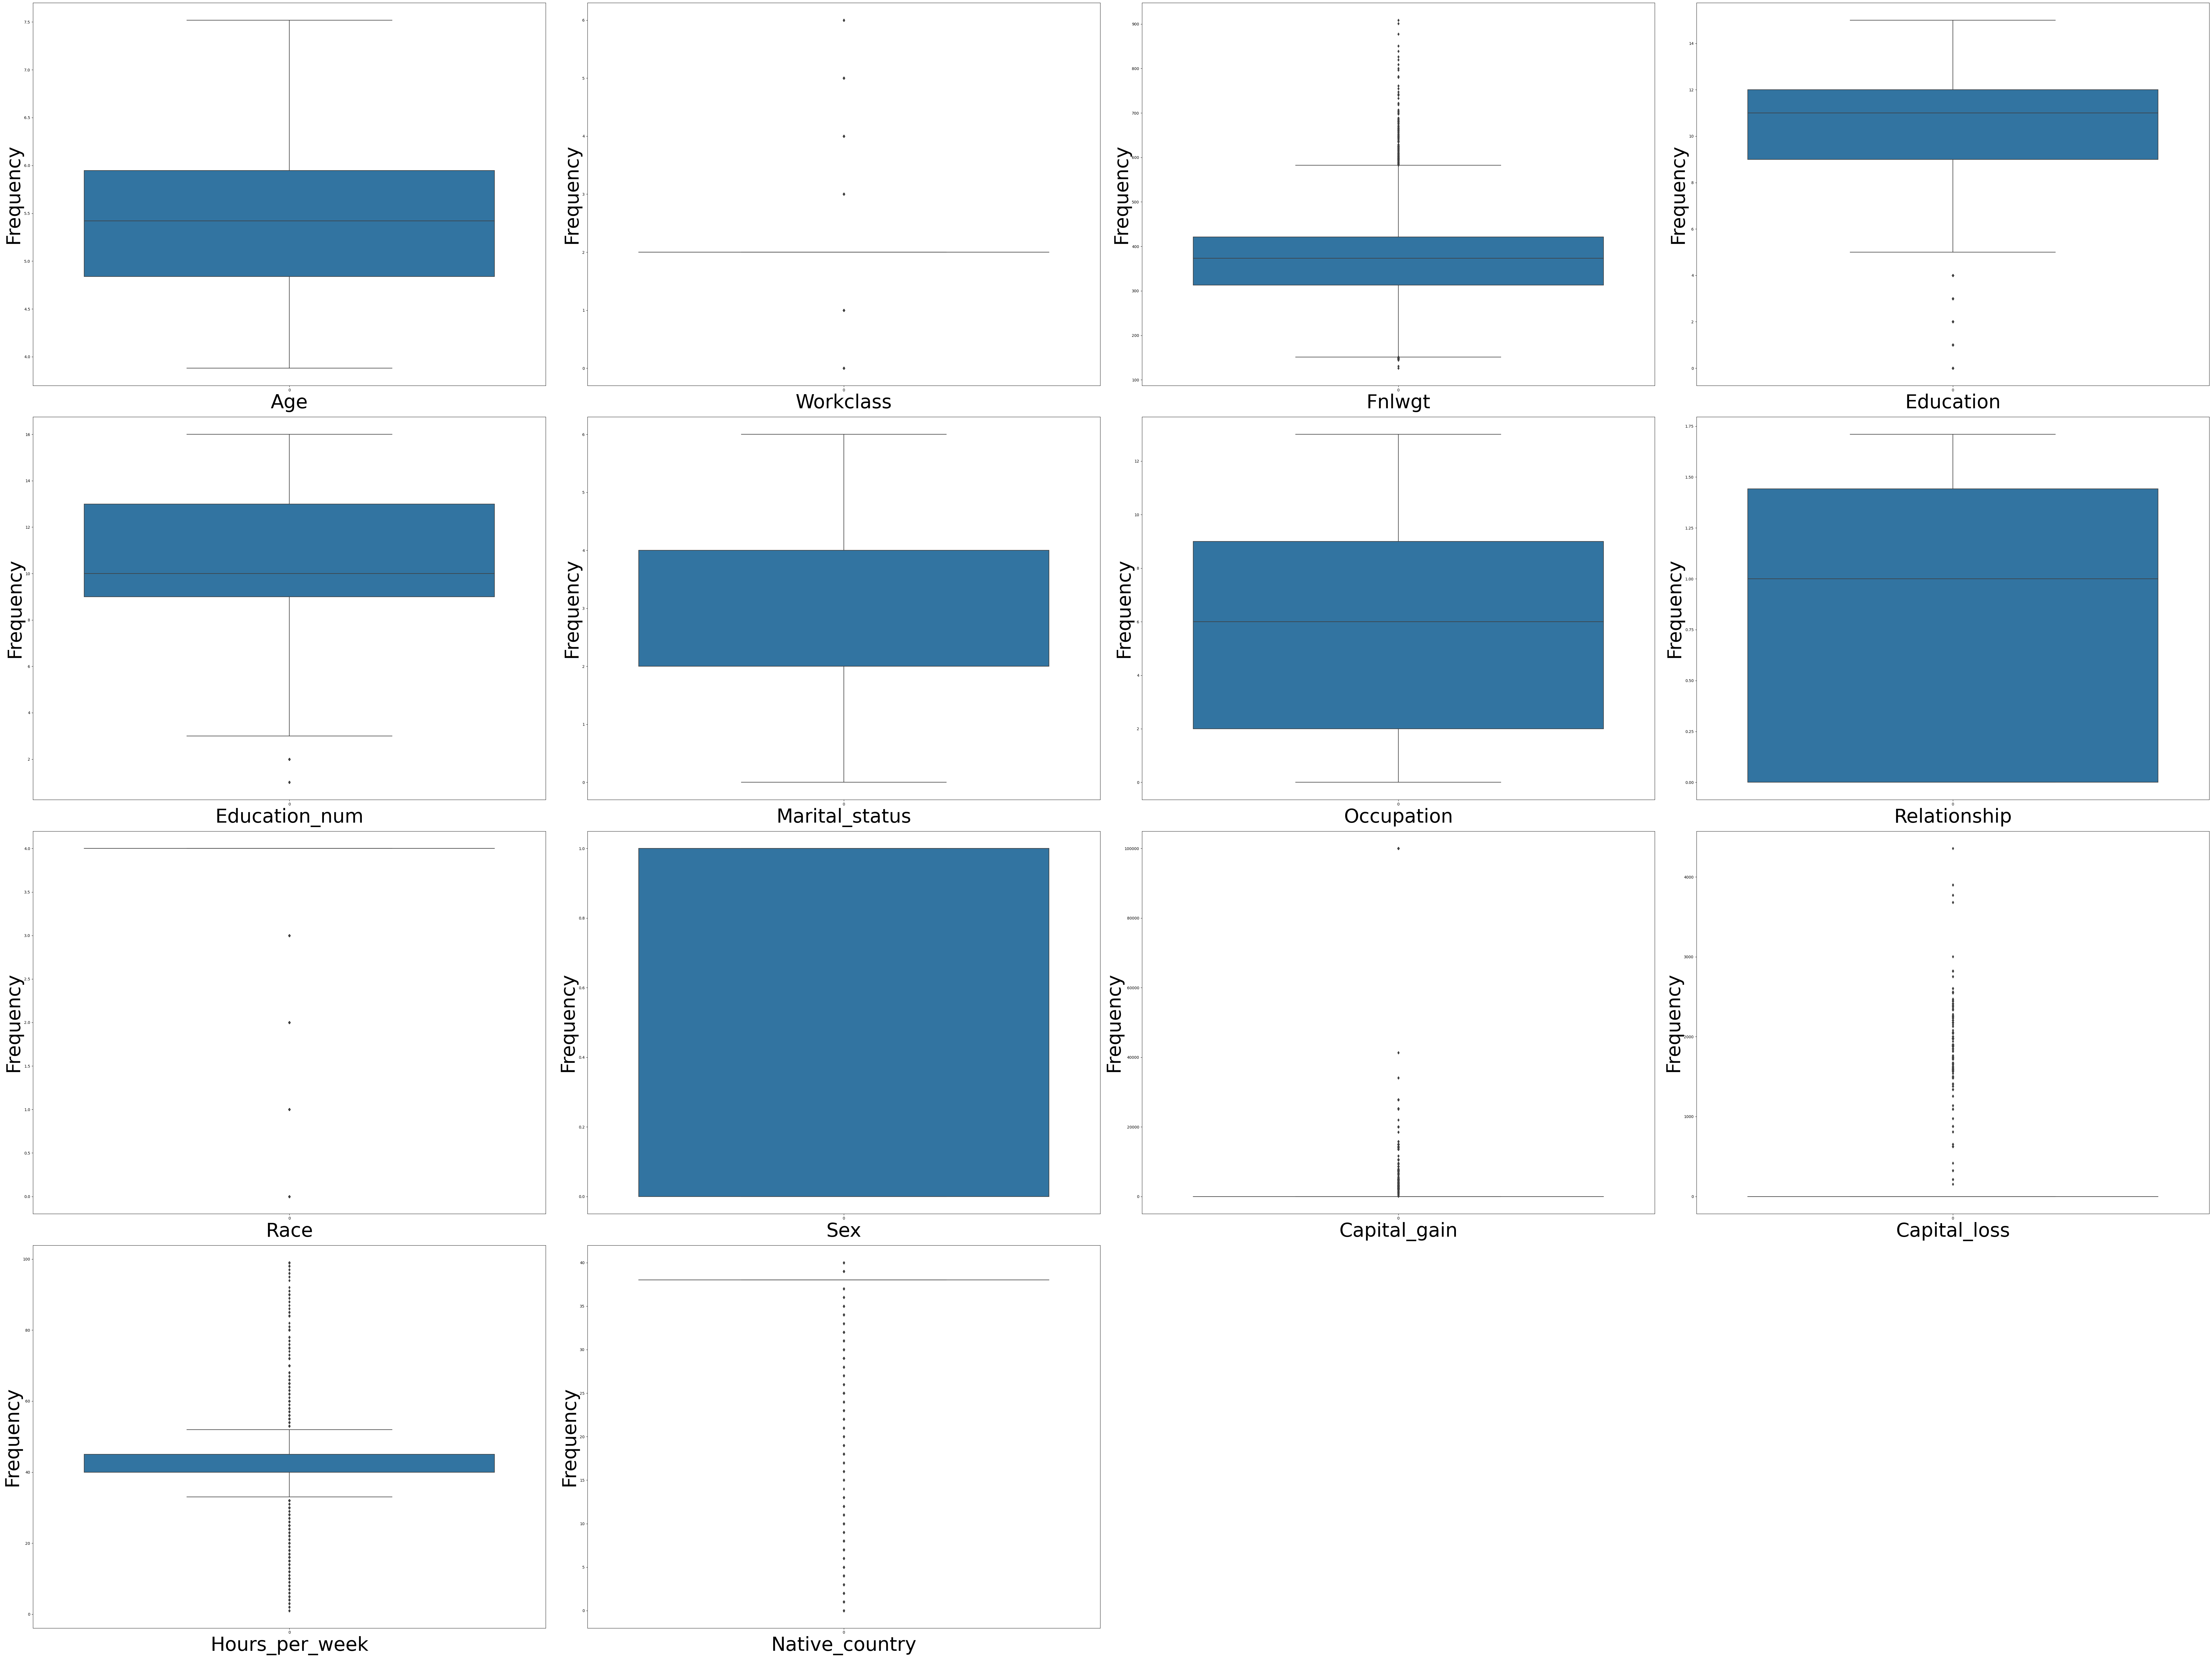

In [23]:
#we will remove try to remove outliers and check for skewness

plt.figure(figsize=(80,60))
iterator=1

for i in df.columns:
    if iterator <=14:
        ax=plt.subplot(4, 4, iterator)
        sns.boxplot(df[i])
        plt.xlabel(i, fontsize=50)
        plt.ylabel('Frequency', fontsize=50)
    iterator+=1
plt.tight_layout()

In [24]:
# Removal of outliers

for i in ['Fnlwgt','Hours_per_week']:
    q75,q25=np.percentile(df.loc[:,i],[75,25])
    intr_qr=q75-q25
    
    max=q75+(1.5*intr_qr)
    min=q25-(1.5*intr_qr)
    
    df.loc[df[i]<min,i]=np.nan
    df.loc[df[i]>max,i]=np.nan

In [25]:
df.isnull().sum()

Age                  0
Workclass            0
Fnlwgt             337
Education            0
Education_num        0
Marital_status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week    7953
Native_country       0
Income               0
dtype: int64

In [26]:
# We can drop few columns and othrs we can transform.List to be dropped as per below

NaN_list=['Fnlwgt']
df=df.dropna(subset=NaN_list)

In [27]:
# Transforming remaining null values with Mean and Median
Mean_Hours=df['Hours_per_week'].mean()
df['Hours_per_week']=df['Hours_per_week'].fillna(Mean_Hours)

# We will not remove outliers from Capital gain or Capital loss, since the data is highly skewed and will detect all other datapoints as outliers

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29824 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             29824 non-null  float64
 1   Workclass       29824 non-null  float64
 2   Fnlwgt          29824 non-null  float64
 3   Education       29824 non-null  float64
 4   Education_num   29824 non-null  float64
 5   Marital_status  29824 non-null  float64
 6   Occupation      29824 non-null  float64
 7   Relationship    29824 non-null  float64
 8   Race            29824 non-null  float64
 9   Sex             29824 non-null  float64
 10  Capital_gain    29824 non-null  float64
 11  Capital_loss    29824 non-null  float64
 12  Hours_per_week  29824 non-null  float64
 13  Native_country  29824 non-null  float64
 14  Income          29824 non-null  float64
dtypes: float64(15)
memory usage: 3.6 MB


## 6.3 Checking for Correlation

<Axes: >

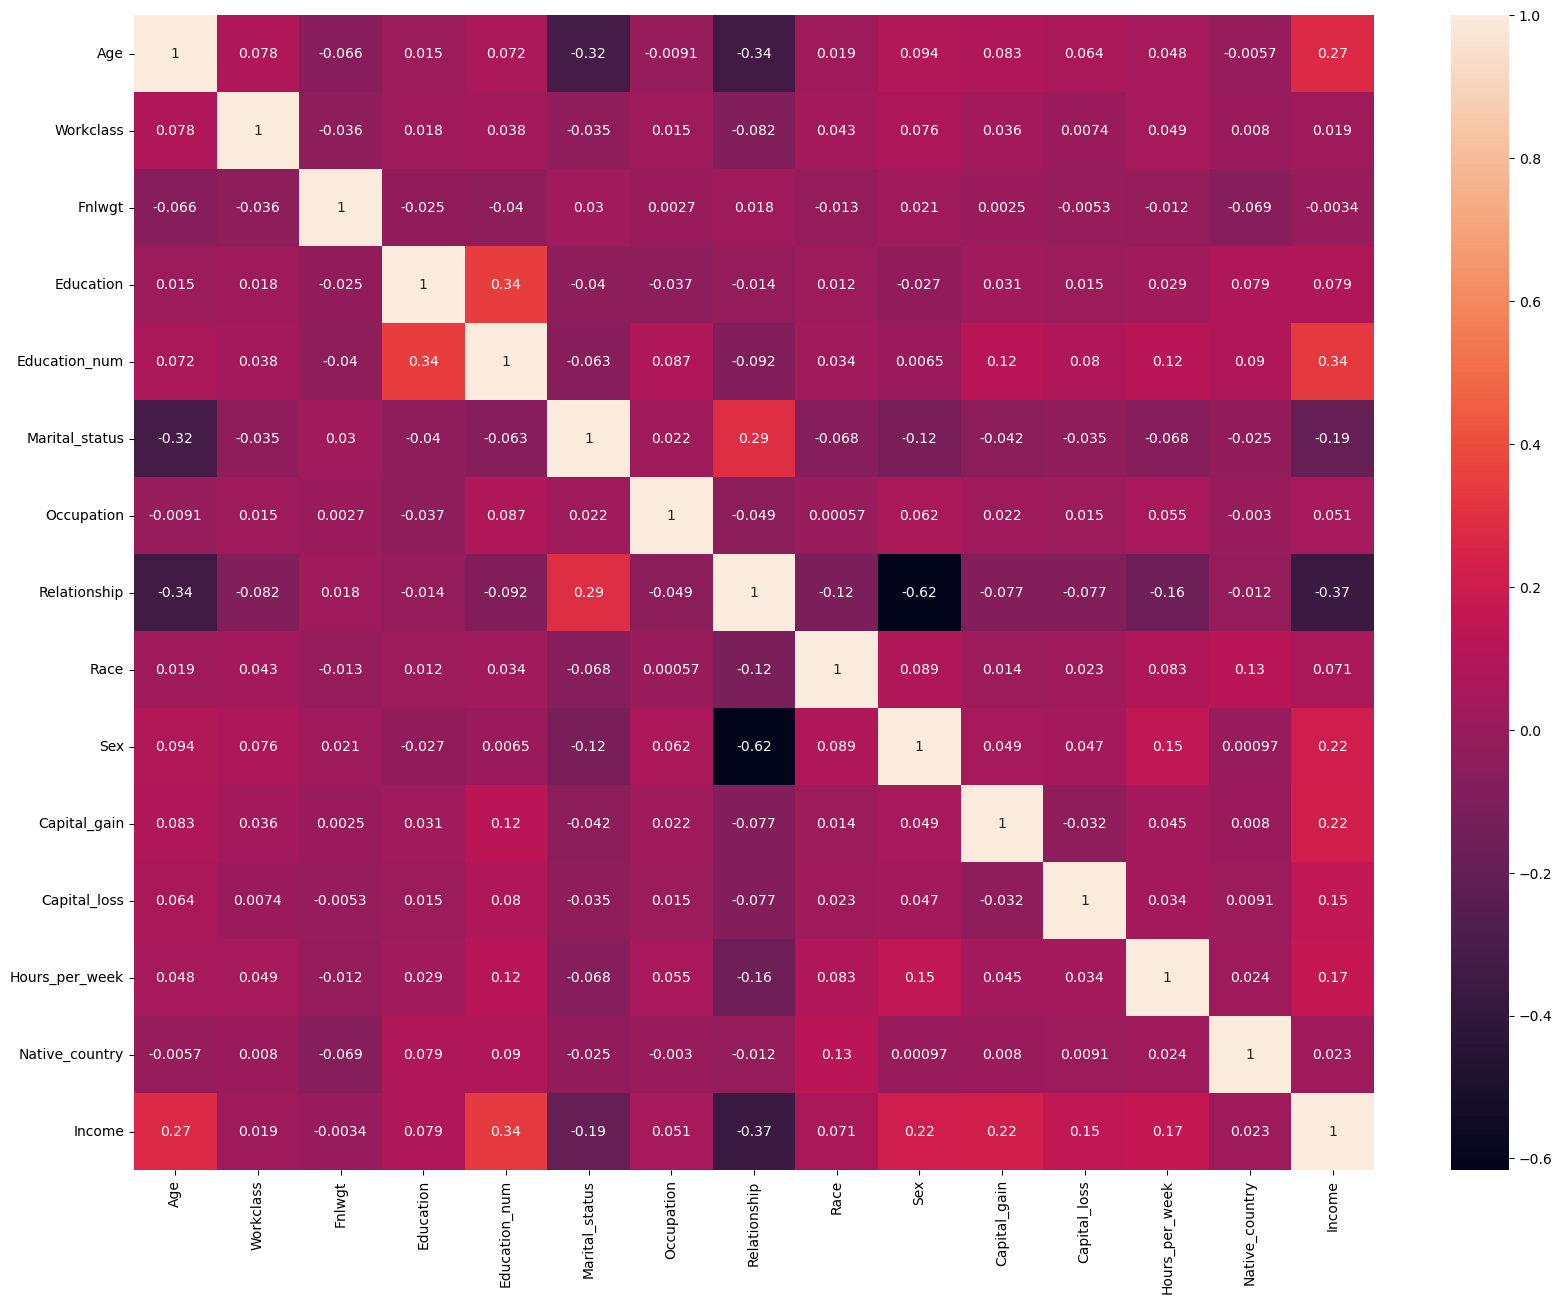

In [29]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10})

# 7.Modelling

## 7.1 Selection of Features

In [30]:
x=df.drop('Income',axis=1)
y=df['Income']

## 7.2 Feature Scaling using Standard Scaler

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.919071,1.886367,-1.115621,-0.350446,1.128142,-0.386535,-0.736123,-1.132164,0.382459,0.692733,-0.147213,-0.218968,0.000000,0.263540
1,0.099704,-0.210268,0.443614,0.174607,-0.441666,-1.721956,-0.239637,0.367573,0.382459,0.692733,-0.147213,-0.218968,-0.467086,0.263540
2,1.099247,-0.210268,0.615055,-2.450657,-1.226570,-0.386535,-0.239637,-1.132164,-2.023458,0.692733,-0.147213,-0.218968,-0.467086,0.263540
3,-0.757847,-0.210268,1.428934,-0.350446,1.128142,-0.386535,0.753336,1.432350,-2.023458,-1.443558,-0.147213,-0.218968,-0.467086,-5.315679
4,0.022589,-0.210268,1.028027,0.437133,1.520594,-0.386535,-0.736123,1.432350,0.382459,-1.443558,-0.147213,-0.218968,-0.467086,0.263540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29819,-0.856329,-0.210268,0.807835,-0.875499,0.735690,-0.386535,1.498065,1.432350,0.382459,-1.443558,-0.147213,-0.218968,-1.044519,0.263540
29820,0.249255,-0.210268,-0.176246,0.174607,-0.441666,-0.386535,0.008607,-1.132164,0.382459,0.692733,-0.147213,-0.218968,-0.467086,0.263540
29821,1.382420,-0.210268,-0.203953,0.174607,-0.441666,2.284307,-1.480852,1.248520,0.382459,-1.443558,-0.147213,-0.218968,-0.467086,0.263540
29822,-1.396981,-0.210268,0.310594,0.174607,-0.441666,0.948886,-1.480852,1.030831,0.382459,0.692733,-0.147213,-0.218968,0.000000,0.263540


## 7.1.3 Removing Multicolinearity

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values, i)
                   for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.241895,Age
1,1.016121,Workclass
2,1.012376,Fnlwgt
3,1.145843,Education
4,1.201786,Education_num
5,1.170687,Marital_status
6,1.019855,Occupation
7,1.944010,Relationship
8,1.038295,Race
9,1.676462,Sex


Multicolinearity is not present is VIF value~1

## 7.1.4 Oversampling

In [33]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

## 7.2 Finding best Random State model and important features for modelling

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

maxAcc = 0
maxRs = 0

for i in range(1, 50):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train, y_train)
    pred = RFC.predict(x_test)
    acc = accuracy_score(y_test, pred)

    if acc > maxAcc:
        maxAcc = acc
        maxRs = i

print("Best Accuracy:", maxAcc)
print("Best Random State:", maxRs)

Best Accuracy: 0.902172295789317
Best Random State: 46


In [35]:
features_imp=RFC.feature_importances_

In [36]:
for index,val in enumerate(features_imp):
    print(index,round((val*100),2))

0 17.77
1 3.4
2 12.19
3 4.77
4 10.25
5 10.94
6 7.71
7 13.92
8 1.19
9 1.82
10 6.98
11 1.95
12 5.91
13 1.19


# 7.3 Selecting best feature for modelling

In [37]:
x=df.drop(['Workclass','Education','Race','Sex','Capital_loss','Native_country','Income'],axis=1)
x

,Age,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Capital_gain,Hours_per_week
0,6.087212,270.742267,13.0,2.0,3.0,0.000000,0.0,41.617802
1,5.477272,404.145306,9.0,0.0,5.0,1.000000,0.0,40.000000
2,6.221336,418.813276,7.0,2.0,5.0,0.000000,0.0,40.000000
3,4.838906,488.446100,13.0,2.0,9.0,1.709976,0.0,40.000000
4,5.419867,454.145836,14.0,2.0,3.0,1.709976,0.0,40.000000
...,...,...,...,...,...,...,...,...
32555,4.765595,435.306919,12.0,2.0,12.0,1.709976,0.0,38.000000
32556,5.588598,351.112144,9.0,2.0,6.0,0.000000,0.0,40.000000
32557,6.432132,348.741578,9.0,6.0,0.0,1.587401,0.0,40.000000
32558,4.363131,392.764545,9.0,4.0,0.0,1.442250,0.0,41.617802


In [38]:
y=df['Income']
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32555    0.0
32556    1.0
32557    0.0
32558    0.0
32559    1.0
Name: Income, Length: 29824, dtype: float64

## 7.4 Creating Train Test Model

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x1,y1, test_size=0.3, random_state=46)

## 7.4 Passing all models at a go

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [41]:
# We are using the oversampled data to make the model.
Accuracy_Score=[]
F1_Score=[]

model = [LogisticRegression(),GaussianNB(), DecisionTreeClassifier(), SVC(), KNeighborsClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), AdaBoostClassifier()]

model_names = ["LogisticRegression", "GaussianNB","Decision Tree Classifier", "SVC", "KNeighbors Classifier","Random Forest Classifier", "Extra Trees Classifier", "Gradient Boosting Classifier", "AdaBoost Classifier"]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    acc= accuracy_score(y_test,predm)
    conf_matrix= confusion_matrix(y_test,predm)
    f1score= f1_score(y_test,predm)
    
    Accuracy_Score.append(acc)
    F1_Score.append(f1score)
    
result_df=pd.DataFrame({
    "Model":model_names,
    "Accuracy Score":Accuracy_Score,
    "F1 Score": F1_Score,
})
print(result_df)

                          Model  Accuracy Score  F1 Score
0            LogisticRegression        0.789540  0.792914
1                    GaussianNB        0.717378  0.659496
2      Decision Tree Classifier        0.847344  0.851002
3                           SVC        0.830159  0.842214
4         KNeighbors Classifier        0.850617  0.862560
5      Random Forest Classifier        0.899643  0.902112
6        Extra Trees Classifier        0.905148  0.908726
7  Gradient Boosting Classifier        0.866315  0.870747
8           AdaBoost Classifier        0.852775  0.856998


Higher, F1 Score and Accuracy Score. Better the Model.
# We will select ExtraTreesClassifier

# 8.Using cross_val model to find the best accuracy

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [43]:
model = [LogisticRegression(),GaussianNB(), DecisionTreeClassifier(), SVC(), KNeighborsClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), AdaBoostClassifier()]

model_names = ["LogisticRegression", "GaussianNB","Decision Tree Classifier", "SVC", "KNeighbors Classifier","Random Forest Classifier", "Extra Trees Classifier", "Gradient Boosting Classifier", "AdaBoost Classifier"]

k=5
cv=KFold(n_splits=k, shuffle=True, random_state=46)

result=[]

for m, name in zip(model,model_names):
    scores=cross_val_score(m, x1, y1, cv=cv, scoring='accuracy')
    avg_scores=scores.mean()
    result.append((name,avg_scores))

result_df=pd.DataFrame(result, columns=['Model','Avg Accuracy Score'])
print(result_df)

                          Model  Avg Accuracy Score
0            LogisticRegression            0.785877
1                    GaussianNB            0.723832
2      Decision Tree Classifier            0.849908
3                           SVC            0.827032
4         KNeighbors Classifier            0.853033
5      Random Forest Classifier            0.896956
6        Extra Trees Classifier            0.901642
7  Gradient Boosting Classifier            0.861581
8           AdaBoost Classifier            0.847543


## Extra Trees Classifier has the best accuracy in Cross_val_score

# 9.Fitting on Actual Data

In [44]:
x

,Age,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Capital_gain,Hours_per_week
0,6.087212,270.742267,13.0,2.0,3.0,0.000000,0.0,41.617802
1,5.477272,404.145306,9.0,0.0,5.0,1.000000,0.0,40.000000
2,6.221336,418.813276,7.0,2.0,5.0,0.000000,0.0,40.000000
3,4.838906,488.446100,13.0,2.0,9.0,1.709976,0.0,40.000000
4,5.419867,454.145836,14.0,2.0,3.0,1.709976,0.0,40.000000
...,...,...,...,...,...,...,...,...
32555,4.765595,435.306919,12.0,2.0,12.0,1.709976,0.0,38.000000
32556,5.588598,351.112144,9.0,2.0,6.0,0.000000,0.0,40.000000
32557,6.432132,348.741578,9.0,6.0,0.0,1.587401,0.0,40.000000
32558,4.363131,392.764545,9.0,4.0,0.0,1.442250,0.0,41.617802


In [45]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32555    0.0
32556    1.0
32557    0.0
32558    0.0
32559    1.0
Name: Income, Length: 29824, dtype: float64

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

ETC=ExtraTreesClassifier()
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=46)
ETC.fit(x_train,y_train)
pred=ETC.predict(x_test)
acc=accuracy_score(y_test,pred)
report=classification_report(y_test,pred)
matrix=confusion_matrix(y_test, pred)

print(f"Accuracy Score: {acc}")
print(f"Classifcation Report:{report}")
print(f"Confusion Matrix:{matrix}")

Accuracy Score: 0.8361645060348681
Classifcation Report:              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      6744
         1.0       0.69      0.61      0.65      2204

    accuracy                           0.84      8948
   macro avg       0.78      0.76      0.77      8948
weighted avg       0.83      0.84      0.83      8948

Confusion Matrix:[[6143  601]
 [ 865 1339]]


# 10. Hyper Paramter Tuning

In [47]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators' : [1,100],
              'max_depth': [None, 5],
              'max_features':['auto','sqrt'],
              'random_state':[1,100],
             }
etc=ExtraTreesClassifier()
GCV=GridSearchCV(etc, parameters, cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [None, 5],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [1, 100], 'random_state': [1, 100]})

In [48]:
GCV.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 100,
 'random_state': 1}

# 11. Selecting the final model with best paramters

In [50]:
FinalModel_Classification=ExtraTreesClassifier(max_depth=None, max_features='auto', n_estimators=100, random_state=1)
FinalModel_Classification.fit(x_train,y_train)
pred=FinalModel_Classification.predict(x_test)
acc=accuracy_score(y_test,pred)
f1=f1_score(y_test,pred)
print(f"Accuracy Score: {acc*100}")
print(f"F1 Score: {f1*100}")

Accuracy Score: 83.31470719713903
F1 Score: 64.25664352406034


# 12. Saving the best Model

In [51]:
import joblib
joblib.dump(FinalModel_Classification,"Census_Income.pkl")

['Census_Income.pkl']